## Predicting in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of  loan using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting  whether the customer will be paying back the loaned amount within 5 days of insurance of loan in time or not.


#### 1. Problem Definition
In a statement,
The problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

#### 2. Data
All of the dataset values were provided by a client.

#### 3. Evaluation
Evaluating a models predictions using problem-specific evaluation metrics

#### 4. Features
#####  Data Dictionary
The following are the features we'll use to predict our target variable (Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter).

*	label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
* msisdn : mobile number of user
* aon : age on cellular network in days
* daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
* daily_decr90: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
* rental30: Average main account balance over last 30 days
* rental90: Average main account balance over last 90 days
* last_rech_date_ma: Number of days till last recharge of main account
* last_rech_date_da: Number of days till last recharge of data account
* last_rech_amt_ma: Amount of last recharge of main account (in Indonesian Rupiah)
* cnt_ma_rech30: Number of times main account got recharged in last 30 days
* fr_ma_rech30: Frequency of main account recharged in last 30 days
* sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
* medianamnt_ma_rech30: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
* medianmarechprebal30: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
* cnt_ma_rech90: Number of times main account got recharged in last 90 days
* fr_ma_rech90: Frequency of main account recharged in last 90 days
* sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indian Rupee)
* medianamnt_ma_rech90: Median of amount of recharges done in main account over last 90 days at user level (in Indian Rupee)
* medianmarechprebal90: Median of main account balance just before recharge in last 90 days at user level (in Indian Rupee)
* cnt_da_rech30: Number of times data account got recharged in last 30 days
* fr_da_rech30: Frequency of data account recharged in last 30 days
* cnt_da_rech90: Number of times data account got recharged in last 90 days
* fr_da_rech90: Frequency of data account recharged in last 90 days
* cnt_loans30: Number of loans taken by user in last 30 days
* amnt_loans30: Total amount of loans taken by user in last 30 days
* maxamnt_loans30: maximum amount of loan taken by the user in last 30 days
* medianamnt_loans30: Median of amounts of loan taken by the user in last 30 days
* cnt_loans90: Number of loans taken by user in last 90 days
* amnt_loans90: Total amount of loans taken by user in last 90 days
* maxamnt_loans90: maximum amount of loan taken by the user in last 90 days
* medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days
* payback30: Average payback time in days over last 30 days
* payback90: Average payback time in days over last 90 days
* pcircle: telecom circle
* pdate: date




In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import flatten

## Data acquisition

In [2]:
# Reading the csv file
df_micro_credit=pd.read_csv(r"C:\Users\devanshu suri\Downloads\Micro-Credit-Project\Micro Credit Project\Data file.csv",parse_dates=['pdate'],index_col=None)
df_micro_credit

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
# Display The head ==> To Check if Data is Properly Imported
df_micro_credit.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df_micro_credit.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [5]:
# checking the features,duplicate values , nan values and unique bvalues in the Datasets

print("\nFeatures Present in the Dataset: \n", df_micro_credit.columns)
shape=df_micro_credit.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])
print("\n\nData Types of Features :\n", df_micro_credit.dtypes)
print("\nDataset contains any NaN/Empty cells : ", df_micro_credit.isnull().values.any())
print("\nTotal number of empty rows in each feature:\n", df_micro_credit.isnull().sum(),"\n\n")
print("Total number of unique values in each feature:")
for col in df_micro_credit.columns.values:
    print("Number of unique values of {} : {}".format(col, df_micro_credit[col].nunique()))
    
print ('\nCreditor and defaulter counts','\n',df_micro_credit.label.value_counts())



Features Present in the Dataset: 
 Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Total Number of Rows :  209593
Total Number of Features :  37


Data Types of Features :
 Unnamed: 0                       int64
label                            int64
msisdn                          object
aon                            float64
daily_

In [6]:
#Removing irrelevant features
df_micro_credit.drop(["Unnamed: 0","pcircle","msisdn","pdate"],axis=1,inplace=True)

In [7]:
#Lets describe the dataset
df_micro_credit.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


* According to Described Information:


>> 1. From an initial statistical overview of the dataset, we infer that some data features are binary or ordinal, whereas other features are continuous. 

>>2. Further, the minimum is negative which is not even possible for most of the features notably daily recharge , main account balance, aon, and last recharge which can't be negative and maximum values for some features, notably for aon ,maxamnt_loans30,medianmarechprebal90,medianmarechprebal30 are unrealistic. 

>>3. Most the features has mode is greater than median this suggests the presence of outliers in the data and All Features are not Normally Distributed( Theortically if feature is normally distributed, Mean = Median = Mode ) like weight and height are right and left skewed.


## Data Preprocessing 

### Data Exploration (exploratory data analysis or EDA)


In [8]:
#Let's check the positive values in each features
(df_micro_credit >= 0).all()

label                    True
aon                     False
daily_decr30            False
daily_decr90            False
rental30                False
rental90                False
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma         True
cnt_ma_rech30            True
fr_ma_rech30             True
sumamnt_ma_rech30        True
medianamnt_ma_rech30     True
medianmarechprebal30    False
cnt_ma_rech90            True
fr_ma_rech90             True
sumamnt_ma_rech90        True
medianamnt_ma_rech90     True
medianmarechprebal90    False
cnt_da_rech30            True
fr_da_rech30             True
cnt_da_rech90            True
fr_da_rech90             True
cnt_loans30              True
amnt_loans30             True
maxamnt_loans30          True
medianamnt_loans30       True
cnt_loans90              True
amnt_loans90             True
maxamnt_loans90          True
medianamnt_loans90       True
payback30                True
payback90                True
dtype: boo

* In some features the negtive values is not possible so I'm removing the negative values in that features except rental30','rental90 features.So in next step i'm dropping these columns take this features later while importing 

In [9]:
# dropping these features but  used thses features later
df_micro_credit.drop(['rental30','rental90'],axis=1,inplace=True)

In [10]:
# Removing negative values in each features
index=[]
for cols in df_micro_credit.columns.values:
    Index_1=df_micro_credit[df_micro_credit[f'{cols}'] < 0].index.values
    Index_2=Index_1.tolist()
    index.append(Index_2)
index_fl=flatten(index)
set(index_fl)
len(index_fl)

9922

* In above loop successfully removed negative values i.e 9922

In [11]:
df_micro_credit.drop(index_fl,inplace=True)

In [12]:
(df_micro_credit >= 0).all(0)

label                   True
aon                     True
daily_decr30            True
daily_decr90            True
last_rech_date_ma       True
last_rech_date_da       True
last_rech_amt_ma        True
cnt_ma_rech30           True
fr_ma_rech30            True
sumamnt_ma_rech30       True
medianamnt_ma_rech30    True
medianmarechprebal30    True
cnt_ma_rech90           True
fr_ma_rech90            True
sumamnt_ma_rech90       True
medianamnt_ma_rech90    True
medianmarechprebal90    True
cnt_da_rech30           True
fr_da_rech30            True
cnt_da_rech90           True
fr_da_rech90            True
cnt_loans30             True
amnt_loans30            True
maxamnt_loans30         True
medianamnt_loans30      True
cnt_loans90             True
amnt_loans90            True
maxamnt_loans90         True
medianamnt_loans90      True
payback30               True
payback90               True
dtype: bool

In [13]:
df_micro_credit[20:30]

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
20,1,100.0,769.614000,777.460000,6.0,0.0,770,5,20.0,8867.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000,0.000000
21,0,378.0,514.693333,515.200000,2.0,0.0,773,1,0.0,773.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000,0.000000
22,1,463.0,1540.000000,1541.000000,4.0,0.0,770,1,0.0,770.0,...,1,6,6.0,0.0,2.0,12,6,0.0,0.000,42.000000
23,1,857.0,58.023333,58.023333,2.0,0.0,1539,4,12.0,6164.0,...,4,24,6.0,0.0,4.0,24,6,0.0,6.000,6.000000
24,0,966.0,291.563333,291.563333,0.0,0.0,0,0,0.0,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000,0.000000
25,1,656.0,63.250000,63.250000,1.0,0.0,770,15,1.0,12674.0,...,5,30,6.0,0.0,5.0,30,6,0.0,1.800,1.800000
26,1,1179.0,3703.272000,3712.840000,2.0,0.0,770,6,5.0,5395.0,...,4,24,6.0,0.0,5.0,30,6,0.0,6.000,6.000000
27,0,871.0,505.600000,508.000000,16.0,0.0,770,1,0.0,770.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000,0.000000
28,1,1610.0,6688.559333,6705.260000,1.0,0.0,4048,9,1.0,32149.0,...,8,48,6.0,0.0,8.0,48,6,0.0,1.375,1.666667
29,1,67.0,16.166667,16.166667,3.0,0.0,1539,2,12.0,3086.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000,0.000000


In [14]:
df_micro_credit_new=pd.read_csv(r"C:\Users\devanshu suri\Downloads\Micro-Credit-Project\Micro Credit Project\Data file.csv",parse_dates=['pdate'],index_col=None)
df_micro_credit_new

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [15]:
df_micro_credit['rental30']=df_micro_credit_new['rental30']
df_micro_credit['rental90']=df_micro_credit_new['rental90']
df_micro_credit['pdate']=df_micro_credit_new['pdate']

In [16]:
df_micro_credit.head()

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90,pdate
0,0,272.0,3055.050000,3065.150000,2.0,0.0,1539,2,21.0,3078.0,...,0.0,2.0,12,6,0.0,29.000000,29.000000,220.13,260.13,2016-07-20
1,1,712.0,12122.000000,12124.750000,20.0,0.0,5787,1,0.0,5787.0,...,0.0,1.0,12,12,0.0,0.000000,0.000000,3691.26,3691.26,2016-08-10
2,1,535.0,1398.000000,1398.000000,3.0,0.0,1539,1,0.0,1539.0,...,0.0,1.0,6,6,0.0,0.000000,0.000000,900.13,900.13,2016-08-19
3,1,241.0,21.228000,21.228000,41.0,0.0,947,0,0.0,0.0,...,0.0,2.0,12,6,0.0,0.000000,0.000000,159.42,159.42,2016-06-06
4,1,947.0,150.619333,150.619333,4.0,0.0,2309,7,2.0,20029.0,...,0.0,7.0,42,6,0.0,2.333333,2.333333,1098.90,1098.90,2016-06-22


## Univariate  Analysis

In [17]:
# Let's find out how many of each class there
df_micro_credit['label'].value_counts()

1    179392
0     23727
Name: label, dtype: int64

Percentage 1    0.883187
0    0.116813
Name: label, dtype: float64


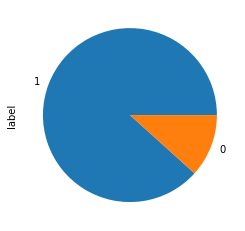

In [18]:
#label percentage in dataset
print('Percentage',df_micro_credit.label.value_counts(normalize=True))
df_micro_credit.label.value_counts().plot(kind='pie')

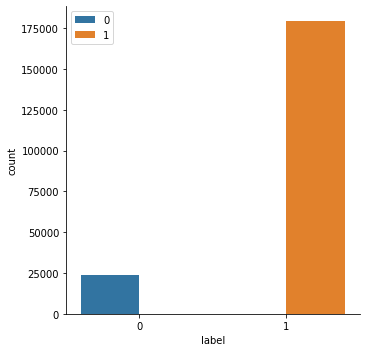

In [19]:
#Lets check the count of each class in target varaible
%matplotlib inline
sns.catplot(x='label',data=df_micro_credit,kind='count',hue='label')
plt.legend()
#here we we see data is inbalanced

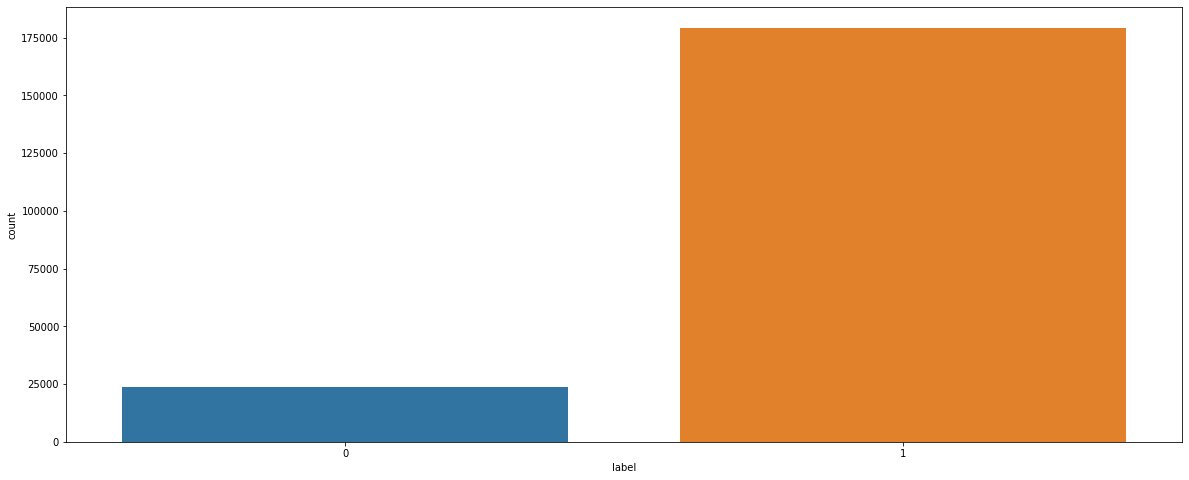

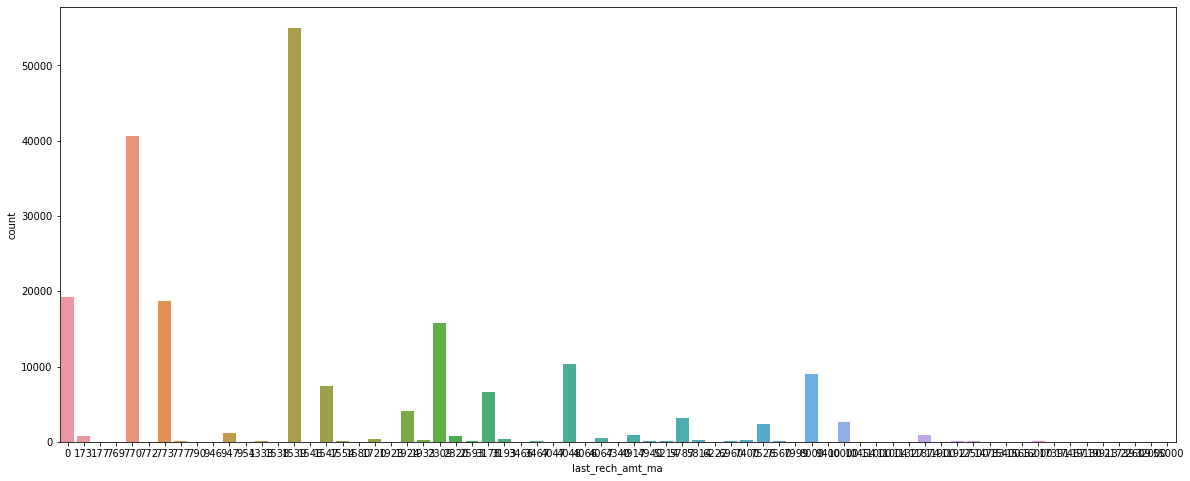

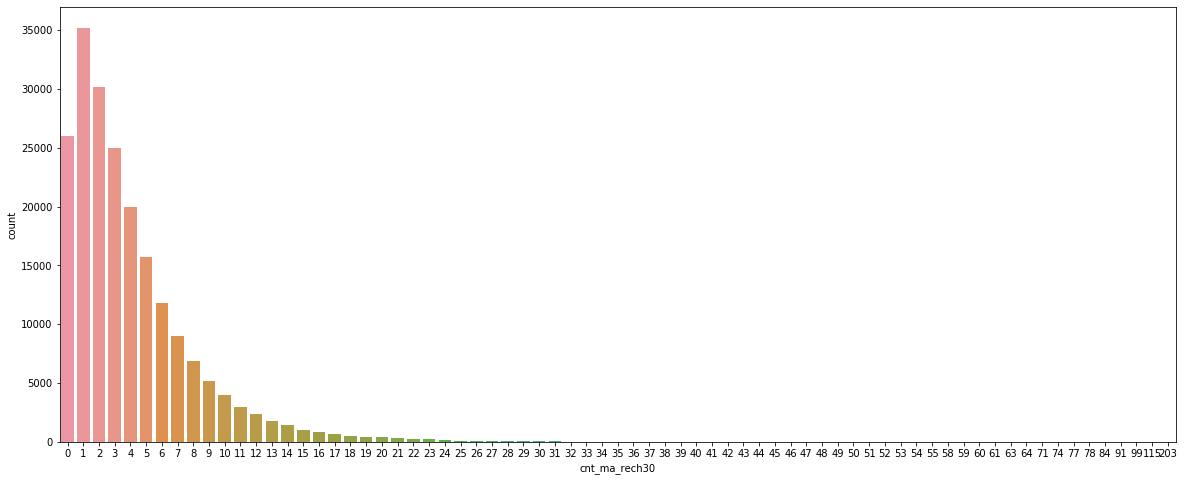

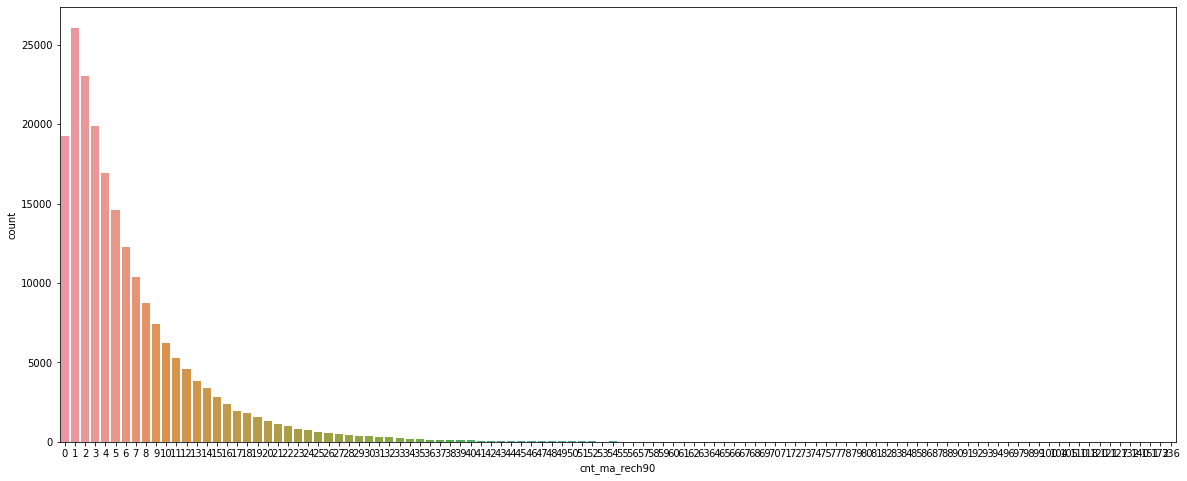

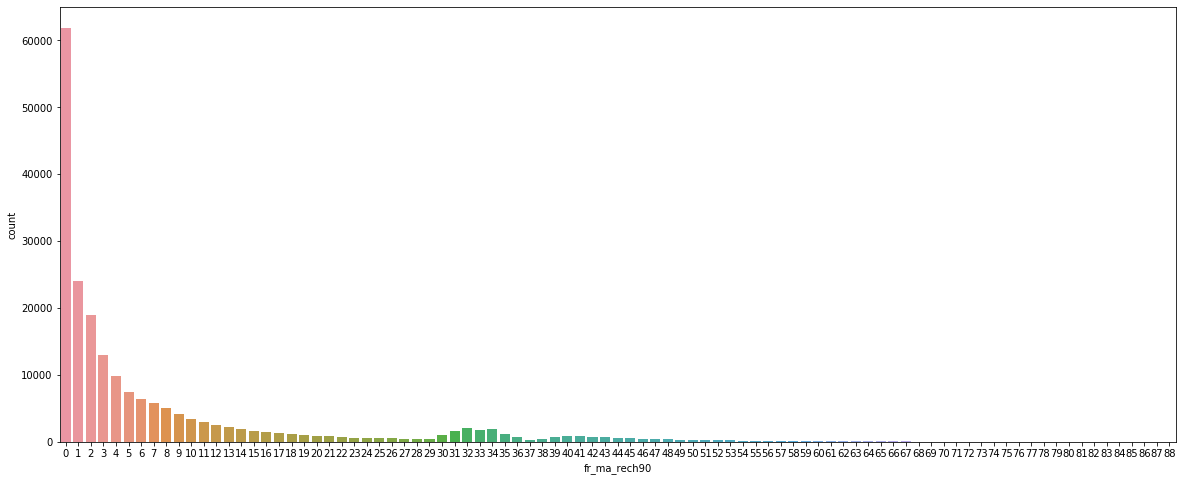

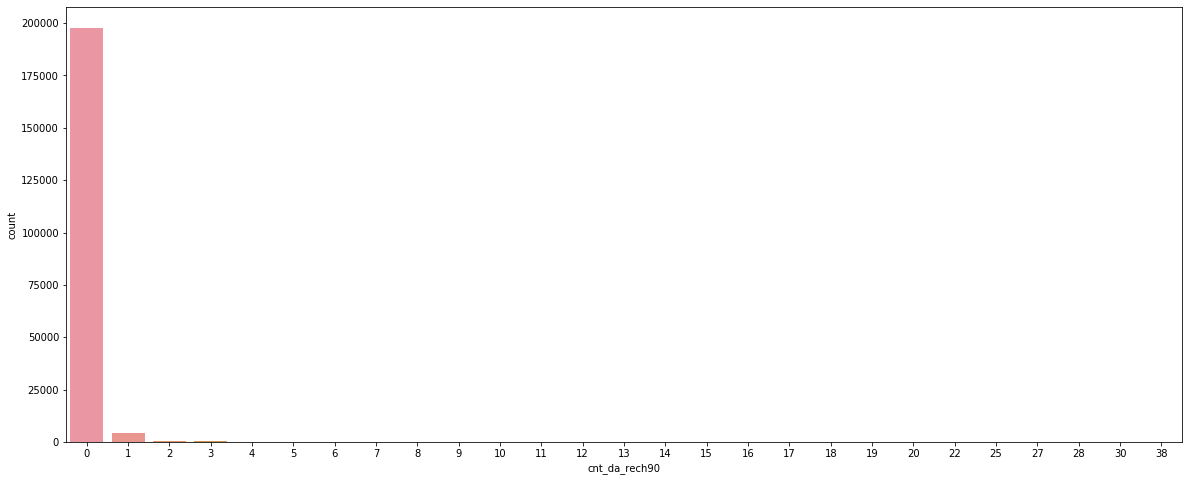

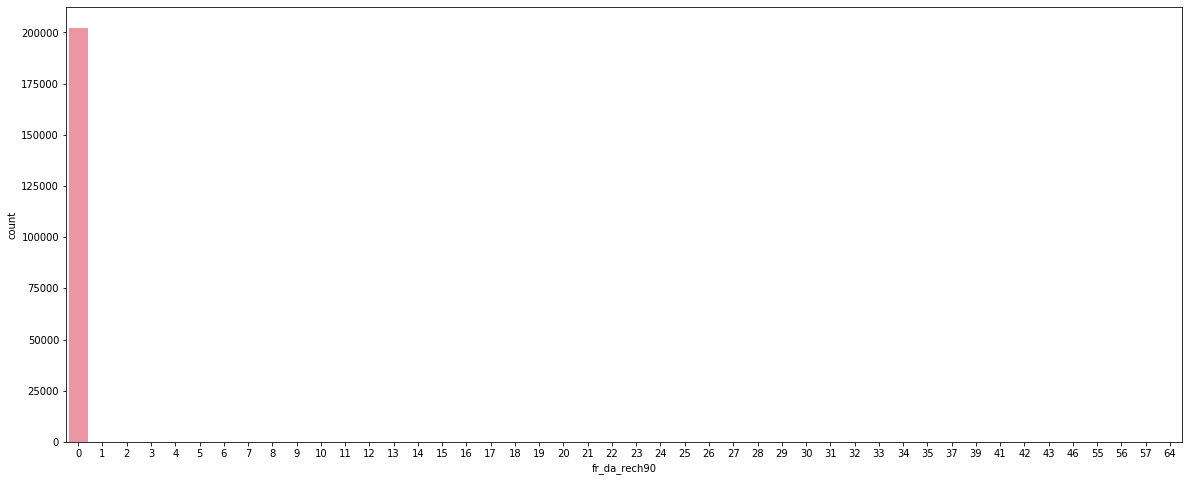

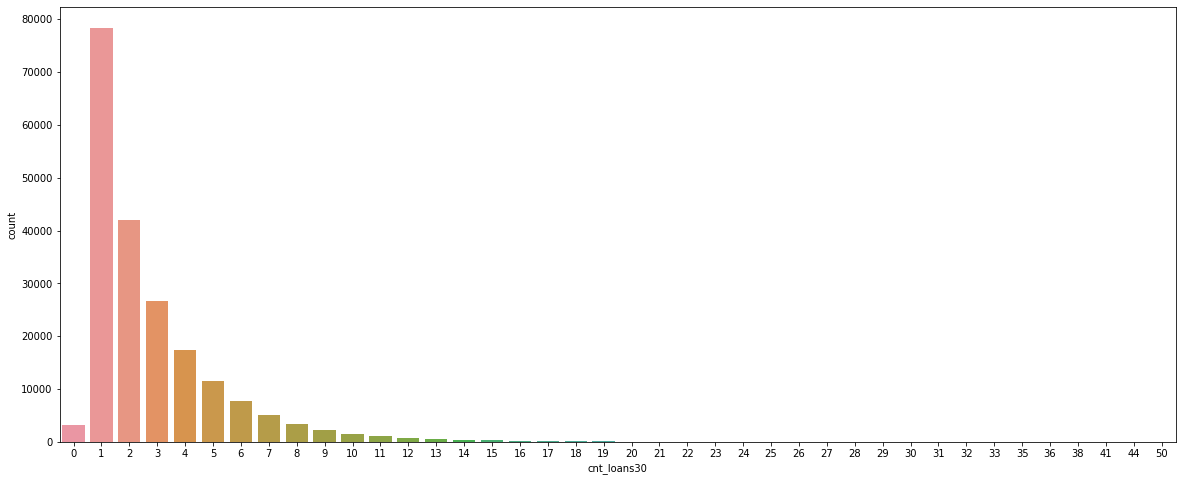

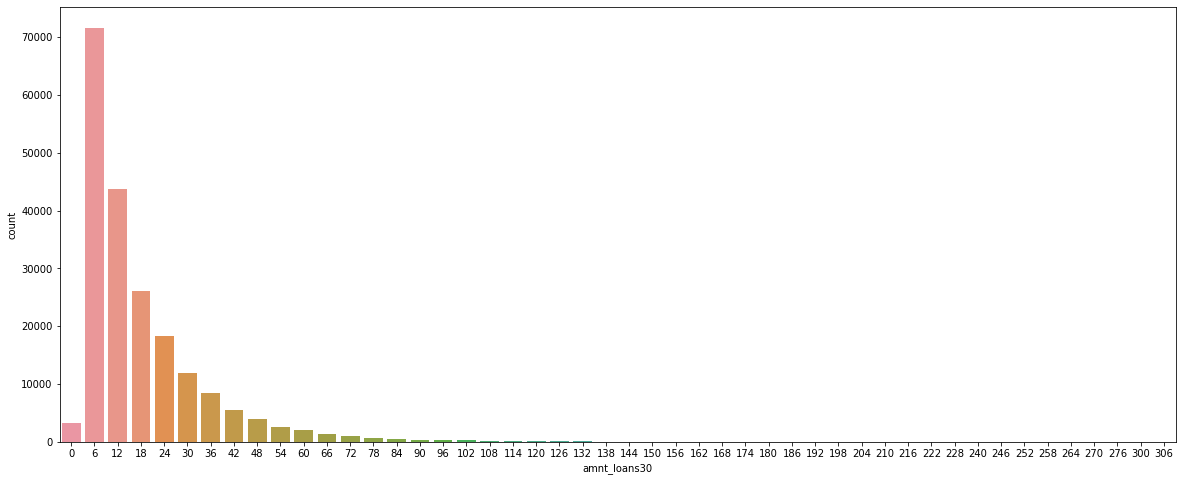

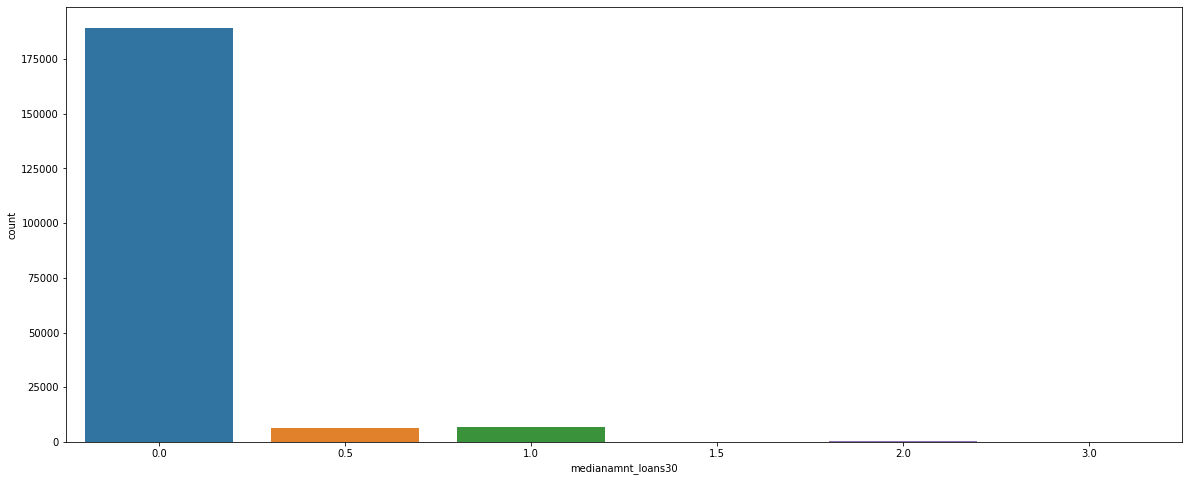

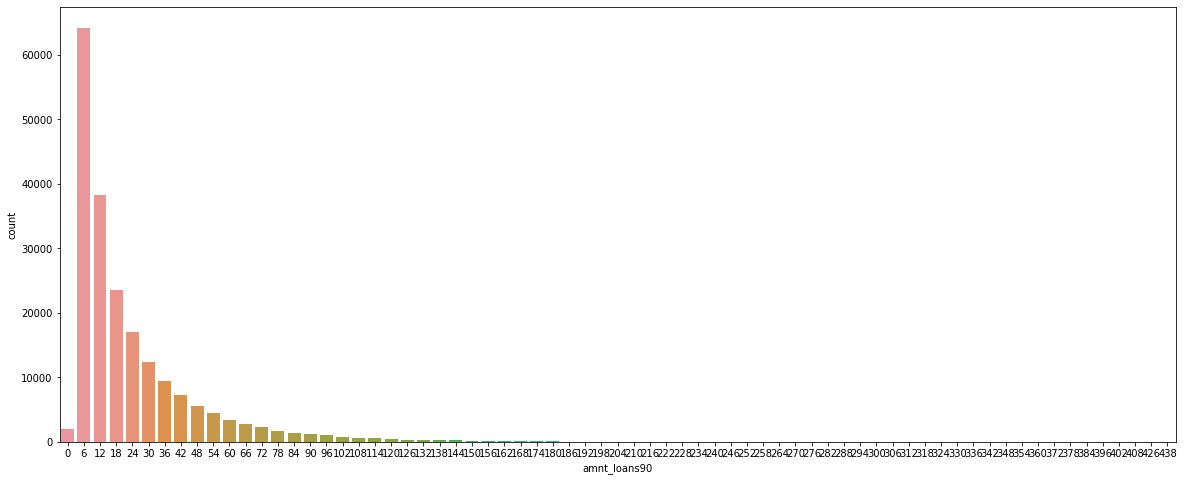

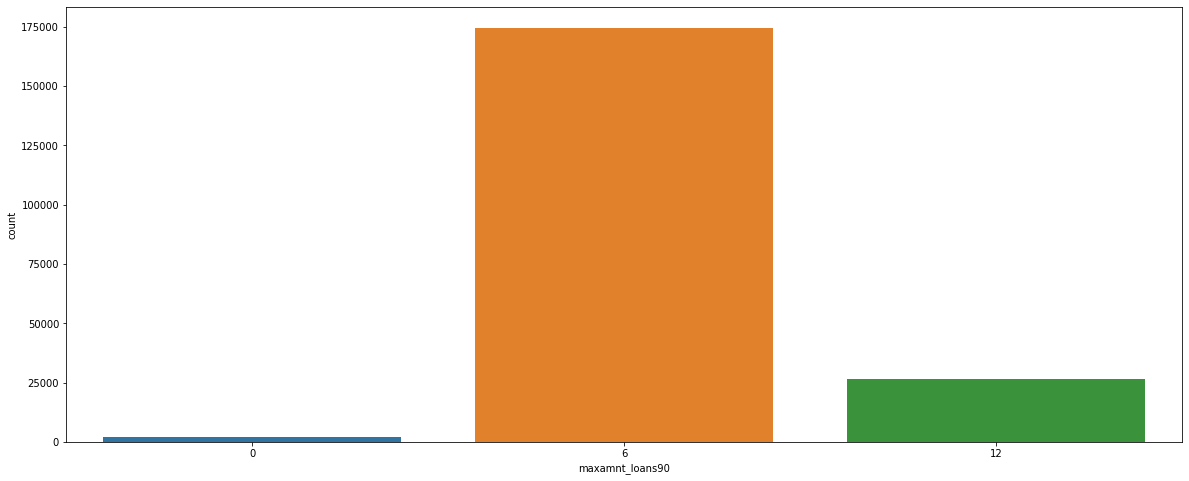

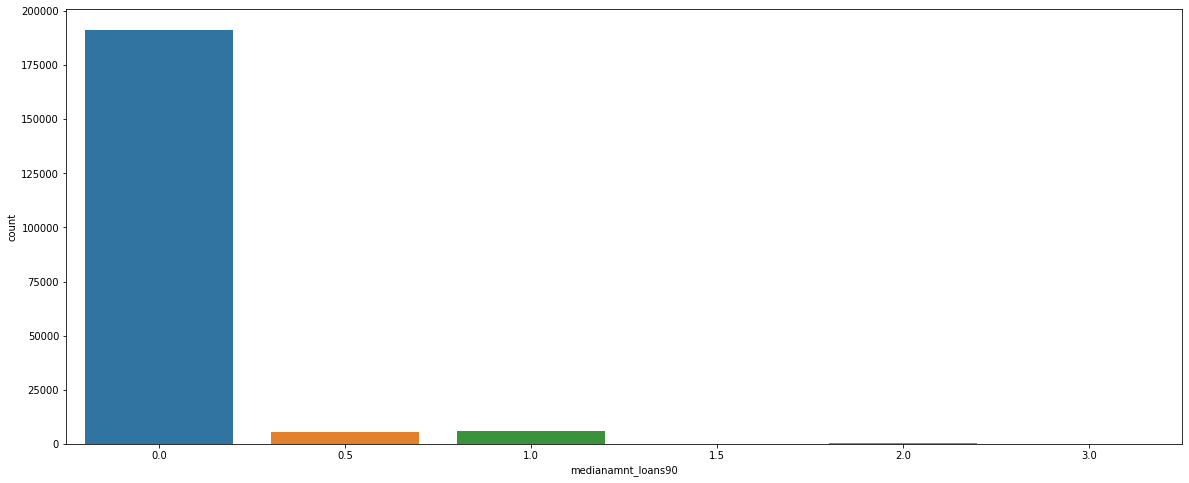

In [20]:
#Lets plot the countplot of list of features 

list_of_col=['label', 'last_rech_amt_ma', 'cnt_ma_rech30','cnt_ma_rech90', 'fr_ma_rech90',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30','amnt_loans30',
      'medianamnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', ]

for i in list_of_col:
    plt.subplots(figsize=(20,8))
    sns.countplot(i,data=df_micro_credit)
    plt.show()

label                      AxesSubplot(0.125,0.826831;0.227941x0.053169)
aon                     AxesSubplot(0.398529,0.826831;0.227941x0.053169)
daily_decr30            AxesSubplot(0.672059,0.826831;0.227941x0.053169)
daily_decr90               AxesSubplot(0.125,0.763028;0.227941x0.053169)
last_rech_date_ma       AxesSubplot(0.398529,0.763028;0.227941x0.053169)
last_rech_date_da       AxesSubplot(0.672059,0.763028;0.227941x0.053169)
last_rech_amt_ma           AxesSubplot(0.125,0.699225;0.227941x0.053169)
cnt_ma_rech30           AxesSubplot(0.398529,0.699225;0.227941x0.053169)
fr_ma_rech30            AxesSubplot(0.672059,0.699225;0.227941x0.053169)
sumamnt_ma_rech30          AxesSubplot(0.125,0.635423;0.227941x0.053169)
medianamnt_ma_rech30    AxesSubplot(0.398529,0.635423;0.227941x0.053169)
medianmarechprebal30    AxesSubplot(0.672059,0.635423;0.227941x0.053169)
cnt_ma_rech90               AxesSubplot(0.125,0.57162;0.227941x0.053169)
fr_ma_rech90             AxesSubplot(0.398529,0.571

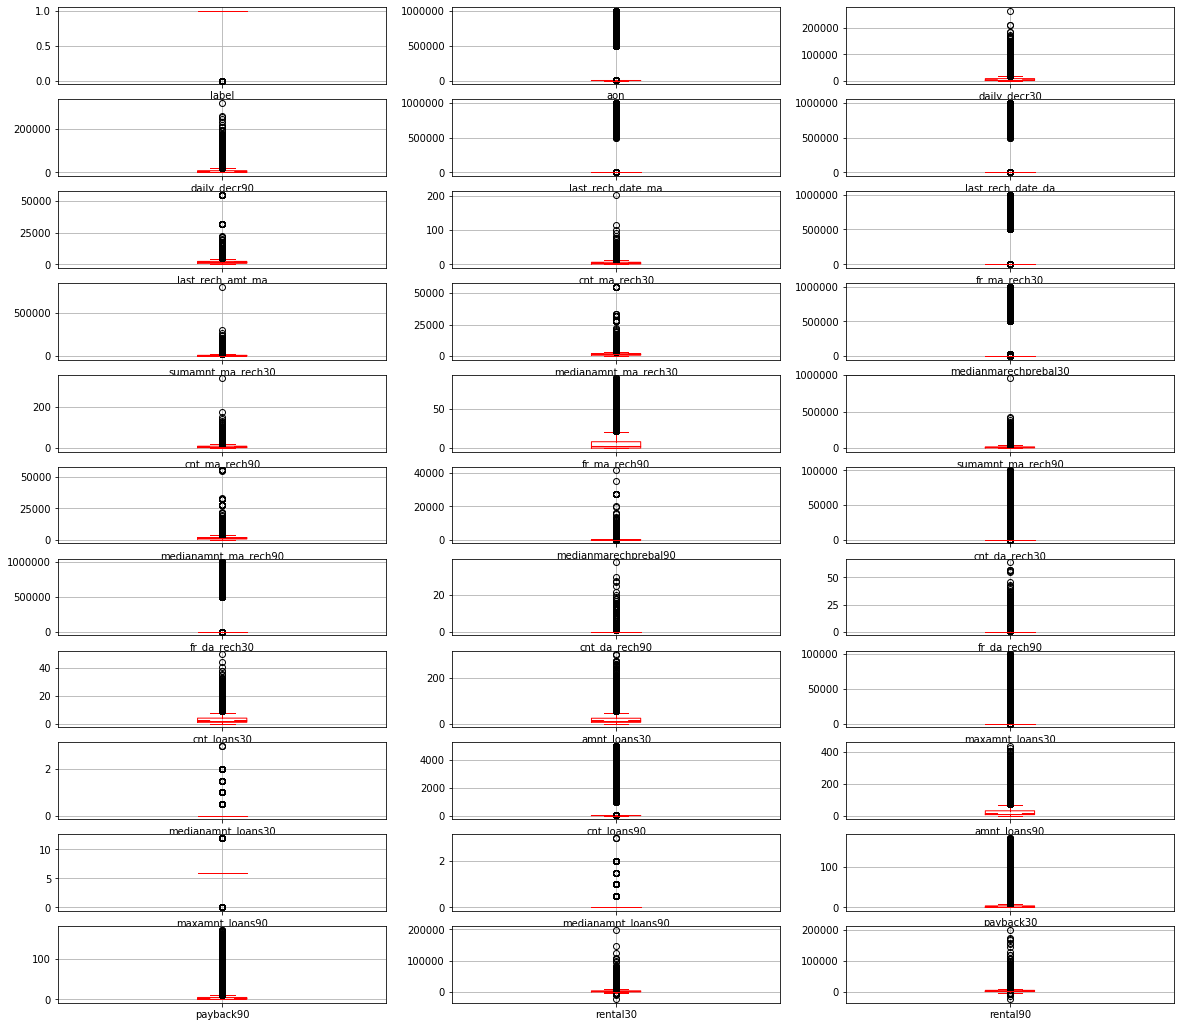

In [21]:
# Plotting the boxplot in order to check few statistical values and outliers
df_micro_credit.drop('pdate',axis=1).plot(kind='box', subplots=True, layout=(12,3),figsize=(20,20), grid=True, notch=True, color='red',legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A790794748>,
      dtype=object)

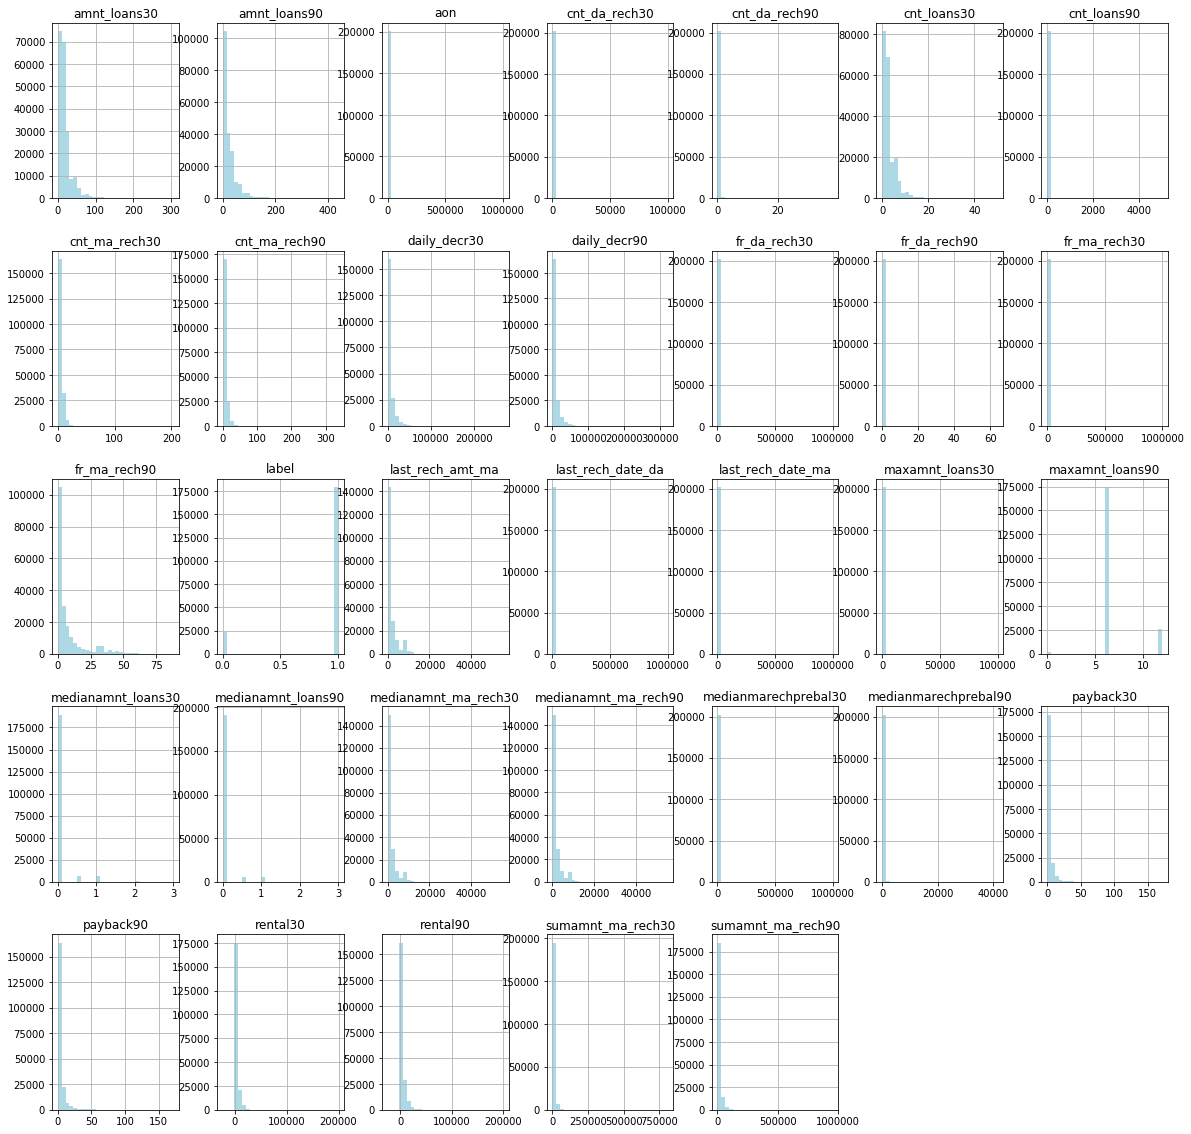

In [22]:
 #Checking the Distribution using the histogram plot.
df_micro_credit.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='lightblue') 

## Bivarient  Analysis


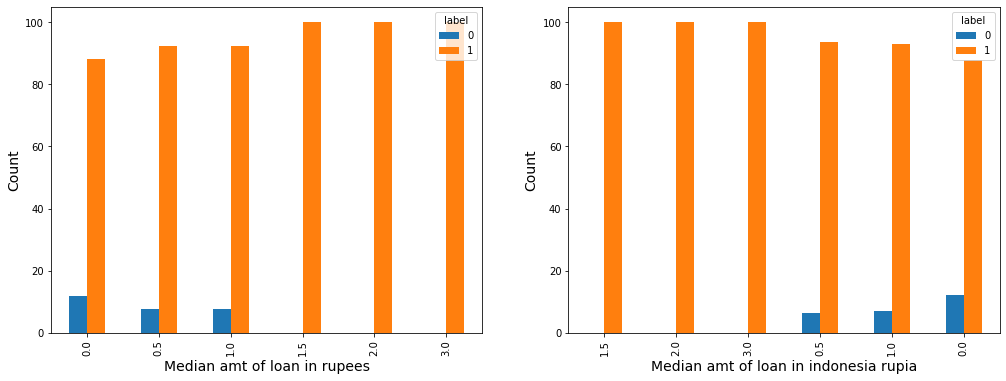

In [23]:
table_medianamnt_loans90  = pd.crosstab(df_micro_credit['medianamnt_loans90'], df_micro_credit['label'])
table_medianamnt_loans30 = pd.crosstab(df_micro_credit['medianamnt_loans30'], df_micro_credit['label'])
table_maxamnt_loans90  = pd.crosstab(df_micro_credit['maxamnt_loans90'], df_micro_credit['label'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_medianamnt_loans90.div(table_medianamnt_loans90.sum(axis= 1),axis = 0)*100).sort_values(by= 1).plot(kind = 'bar',ax=ax);
plt.xlabel("Median amt of loan in rupees",fontsize = 14);
plt.ylabel('Count',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_medianamnt_loans30.div(table_medianamnt_loans30.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax=ax);
plt.xlabel("Median amt of loan in indonesia rupia",fontsize = 14);
plt.ylabel('Count',fontsize = 14);


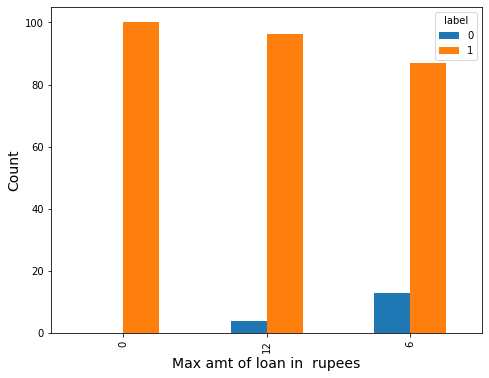

In [24]:
fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,2)
(table_maxamnt_loans90.div(table_maxamnt_loans90.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax=ax);
plt.xlabel("Max amt of loan in  rupees",fontsize = 14);
plt.ylabel('Count',fontsize = 14);

In [25]:
# Checking the label corelation with other features
df_micro_credit.corr()['label'].sort_values()

fr_da_rech90           -0.006770
medianmarechprebal30   -0.003660
aon                    -0.003257
fr_da_rech30           -0.000628
fr_ma_rech30            0.000269
cnt_da_rech90           0.000457
maxamnt_loans30         0.000591
last_rech_date_da       0.000777
last_rech_date_ma       0.003291
cnt_da_rech30           0.003886
cnt_loans90             0.005160
medianamnt_loans90      0.033279
medianmarechprebal90    0.035454
medianamnt_loans30      0.041934
payback30               0.042385
payback90               0.042864
rental30                0.053048
rental90                0.070185
fr_ma_rech90            0.073161
maxamnt_loans90         0.080027
medianamnt_ma_rech90    0.109699
last_rech_amt_ma        0.120954
medianamnt_ma_rech30    0.130066
daily_decr90            0.160075
daily_decr30            0.161804
cnt_loans30             0.188395
amnt_loans30            0.189479
amnt_loans90            0.192480
sumamnt_ma_rech30       0.193586
sumamnt_ma_rech90       0.197374
cnt_ma_rec

* From above we can say that most the features has same correleations  values ,so we are going to drop them in next steps

In [26]:
#Feature Removal
print(f"Number of columns before deleting: {df_micro_credit.shape[1]}")
del_cols = ["daily_decr30","fr_ma_rech30","payback30","rental30","medianamnt_loans30","amnt_loans30",
                "fr_da_rech30","cnt_da_rech30","sumamnt_ma_rech30","fr_ma_rech30","cnt_ma_rech30","pdate"]
df_micro_credit.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {df_micro_credit.shape[1]}")

Number of columns before deleting: 34
Number of columns after deleting: 23


In [27]:
# Lets remove outliers in last_rech_date_ma,last_rech_date_da,aon,cnt_loans90 and maxamnt_loans30 within certain limit
df_clean = df_micro_credit[df_micro_credit['last_rech_date_ma'] < 250]  
df_clean = df_clean[df_clean['last_rech_date_da'] <= 115]
df_clean = df_clean[df_clean['aon'] < 2500]
df_clean = df_clean[df_clean['cnt_loans90'] <= 71]
df_clean = df_clean[df_clean['maxamnt_loans30'] <= 12]


In [28]:
#Lets check how much data we lost
df_clean.shape

(197074, 23)

In [29]:
#Let's convert the currency sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90 which is in rupees conver into indonesia rupia
from currency_converter import CurrencyConverter
c = CurrencyConverter()
li=['sumamnt_ma_rech90','medianamnt_ma_rech90','medianmarechprebal90']
df_clean['sumamnt_ma_rech90']=df_clean['sumamnt_ma_rech90'].apply(lambda x: c.convert(x, 'INR', 'IDR'))
df_clean['medianmarechprebal90']=df_clean['medianmarechprebal90'].apply(lambda x: c.convert(x, 'INR', 'IDR'))
df_clean['medianamnt_ma_rech90']=df_clean['medianamnt_ma_rech90'].apply(lambda x: c.convert(x, 'INR', 'IDR'))


In [30]:
#checking skewness values
df_clean.skew()
#From below output it is clear that skewness exist

label                   -2.385382
aon                      0.955740
daily_decr90             4.223756
last_rech_date_ma        3.558246
last_rech_date_da        9.541342
last_rech_amt_ma         3.778608
medianamnt_ma_rech30     3.457059
medianmarechprebal30    14.887157
cnt_ma_rech90            3.415783
fr_ma_rech90             2.280832
sumamnt_ma_rech90        4.921478
medianamnt_ma_rech90     3.722286
medianmarechprebal90    44.948803
cnt_da_rech90           27.026340
fr_da_rech90            28.852493
cnt_loans30              2.675302
maxamnt_loans30          1.397167
cnt_loans90              2.968752
amnt_loans90             3.115186
maxamnt_loans90          1.644180
medianamnt_loans90       4.925344
payback90                6.858323
rental90                 4.416034
dtype: float64

In [31]:
#lets remove the skewness
for i in df_clean.drop(['label','rental90'],axis=1).columns:
    if df_clean.skew().loc[i]>0.55:
        df_clean[i]=np.log1p(df_clean[i])
    elif df_clean.skew().loc[i]<-0.5:
        df_clean[i]=np.square(df_clean[i])
df_clean.skew()

label                   -2.385382
aon                     -0.439930
daily_decr90            -0.449093
last_rech_date_ma        0.500062
last_rech_date_da        6.231370
last_rech_amt_ma        -2.255726
medianamnt_ma_rech30    -1.924193
medianmarechprebal30     0.273415
cnt_ma_rech90           -0.053401
fr_ma_rech90             0.503199
sumamnt_ma_rech90       -2.463740
medianamnt_ma_rech90    -2.600516
medianmarechprebal90    -1.825125
cnt_da_rech90            8.400197
fr_da_rech90            17.846944
cnt_loans30              0.688376
maxamnt_loans30         -2.919760
cnt_loans90              0.730149
amnt_loans90             0.205065
maxamnt_loans90         -2.382667
medianamnt_loans90       4.351535
payback90                0.734191
rental90                 4.416034
dtype: float64

In [32]:
df_clean.isna().sum()

label                   0
aon                     0
daily_decr90            0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
maxamnt_loans30         0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback90               0
rental90                0
dtype: int64

label                      AxesSubplot(0.125,0.826831;0.227941x0.053169)
aon                     AxesSubplot(0.398529,0.826831;0.227941x0.053169)
daily_decr90            AxesSubplot(0.672059,0.826831;0.227941x0.053169)
last_rech_date_ma          AxesSubplot(0.125,0.763028;0.227941x0.053169)
last_rech_date_da       AxesSubplot(0.398529,0.763028;0.227941x0.053169)
last_rech_amt_ma        AxesSubplot(0.672059,0.763028;0.227941x0.053169)
medianamnt_ma_rech30       AxesSubplot(0.125,0.699225;0.227941x0.053169)
medianmarechprebal30    AxesSubplot(0.398529,0.699225;0.227941x0.053169)
cnt_ma_rech90           AxesSubplot(0.672059,0.699225;0.227941x0.053169)
fr_ma_rech90               AxesSubplot(0.125,0.635423;0.227941x0.053169)
sumamnt_ma_rech90       AxesSubplot(0.398529,0.635423;0.227941x0.053169)
medianamnt_ma_rech90    AxesSubplot(0.672059,0.635423;0.227941x0.053169)
medianmarechprebal90        AxesSubplot(0.125,0.57162;0.227941x0.053169)
cnt_da_rech90            AxesSubplot(0.398529,0.571

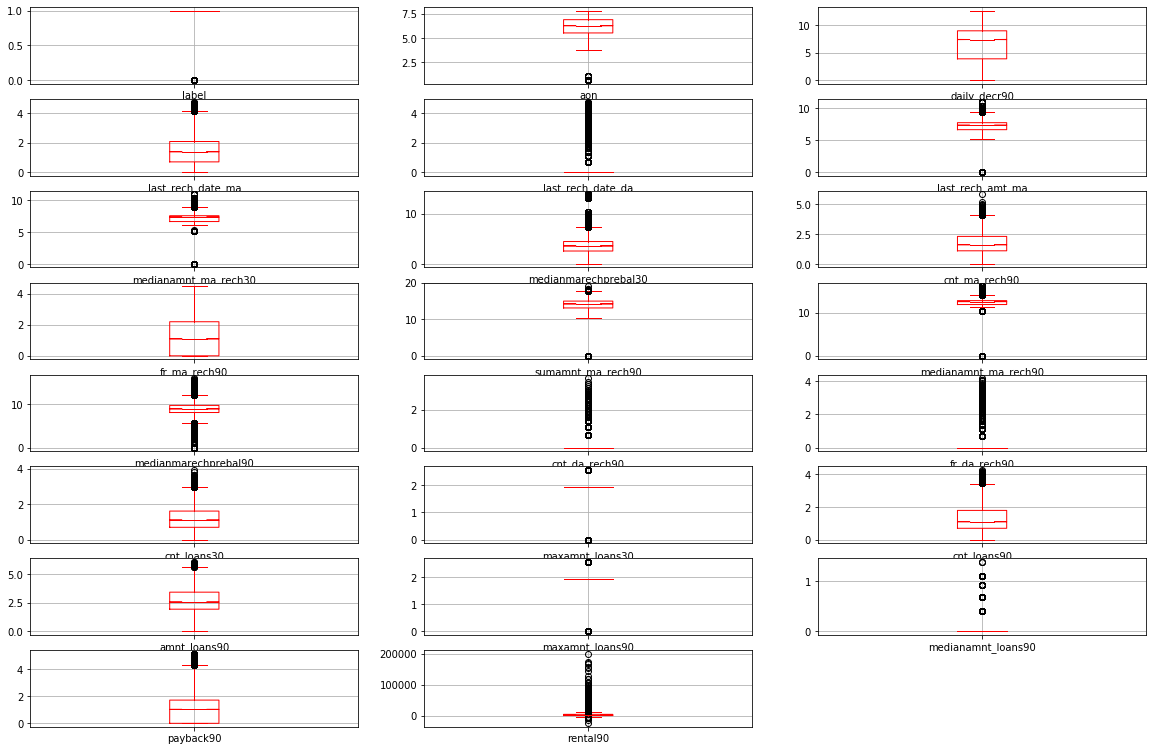

In [33]:
# Plotting the boxplot in order to check few statistical values and outliers
df_clean.plot(kind='box', subplots=True, layout=(12,3),figsize=(20,20), grid=True, notch=True, color='red',legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A79DACE708>,
      dtype=object)

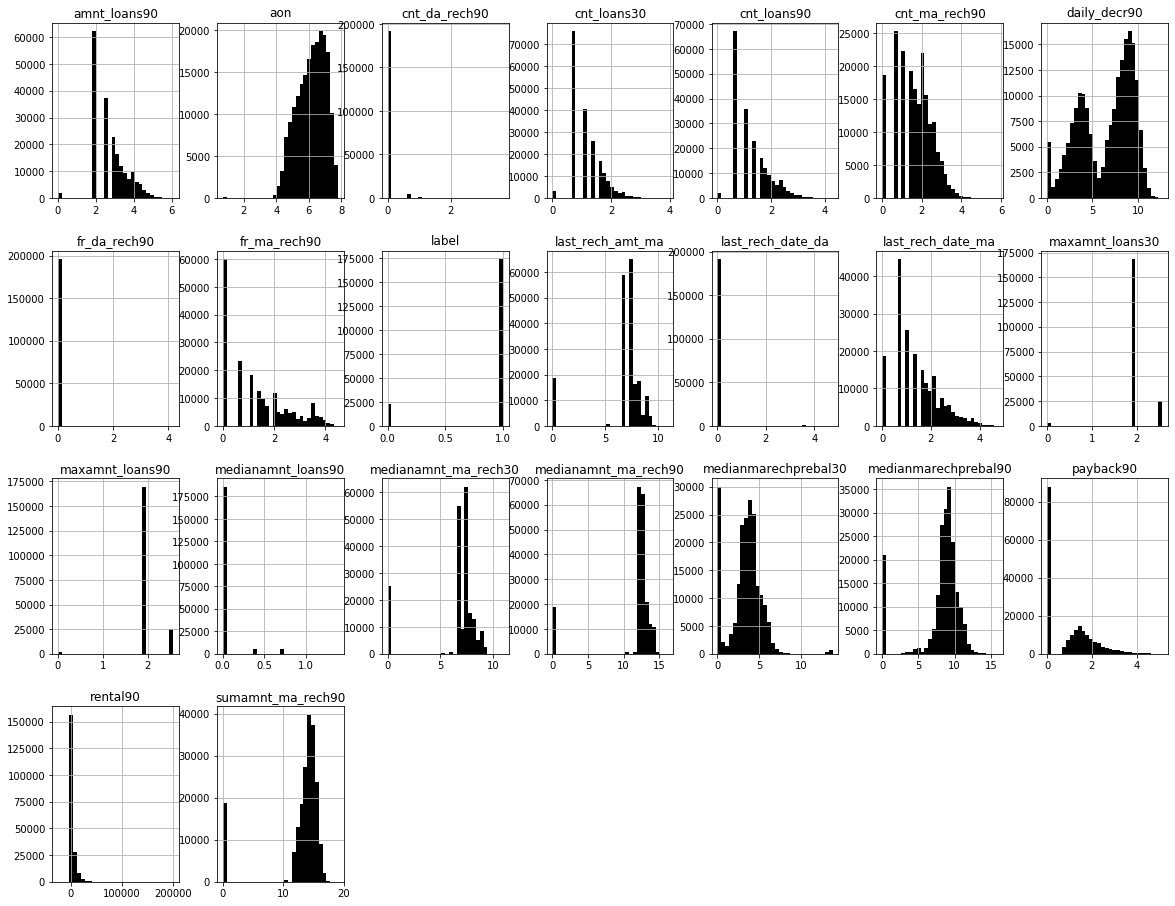

In [34]:
 #Checking the Distribution using the histogram plot.
df_clean.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='black') 

In [35]:
df_visual=df_clean.copy()

In [36]:
df_visual.reset_index(inplace = True)
df_visual.drop(['daily_decr90', 'last_rech_date_ma','last_rech_date_da', 'last_rech_amt_ma', 'medianamnt_ma_rech30',
                'medianmarechprebal30', 'fr_ma_rech90','medianamnt_ma_rech90', 'medianmarechprebal90',
                'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'maxamnt_loans30','maxamnt_loans90', 'medianamnt_loans90',]
               ,axis=1,inplace=True)


# df_visual=df_clean
df_visual

,index,label,aon,cnt_ma_rech90,sumamnt_ma_rech90,cnt_loans90,amnt_loans90,payback90,rental90
0,0,0,5.609472,1.098612,13.313717,1.098612,2.564949,3.401197,260.13
1,1,1,6.569481,0.693147,13.945051,0.693147,2.564949,0.000000,3691.26
2,2,1,6.284134,0.693147,12.620572,0.693147,1.945910,0.000000,900.13
3,3,1,5.488938,0.693147,12.134985,1.098612,2.564949,0.000000,159.42
4,4,1,6.854355,2.197225,15.346266,2.079442,3.761200,1.203973,1098.90
...,...,...,...,...,...,...,...,...,...
197069,209588,1,6.003887,1.386294,14.531627,1.098612,2.564949,0.693147,1089.19
197070,209589,1,6.981006,1.945910,13.585187,1.386294,2.944439,0.693147,1728.36
197071,209590,1,6.921658,2.484907,15.112167,1.945910,4.007333,1.575536,8893.20
197072,209591,1,7.457609,1.945910,15.076525,1.386294,3.218876,2.442347,984.58


In [37]:
conditions_1=[(df_visual['rental90'] <=0),df_visual['rental90'].between(0,1379),df_visual['rental90'].between(1379,4280),(df_visual['rental90'] > 4280)]
values_1= ['Negative or zero Balance', 'Low Balance', 'Average Balance','High Balance']
df_visual['Balance_Category']=np.select(conditions_1,values_1)

In [38]:
df_visual['Balance_Category'].value_counts()

Low Balance                 87021
High Balance                49379
Average Balance             49179
Negative or zero Balance    11495
Name: Balance_Category, dtype: int64

In [39]:
# Mapping balance groups with precentage value with respect to label 
balance_category_percent = pd.crosstab(df_visual['label'],df_visual['Balance_Category']).apply(lambda x: x/x.sum()*100)
balance_category_percent = balance_category_percent.transpose()
balance_category_percent

label,0,1
Balance_Category,,
Average Balance,10.014437,89.985563
High Balance,7.930497,92.069503
Low Balance,12.588915,87.411085
Negative or zero Balance,28.125272,71.874728


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

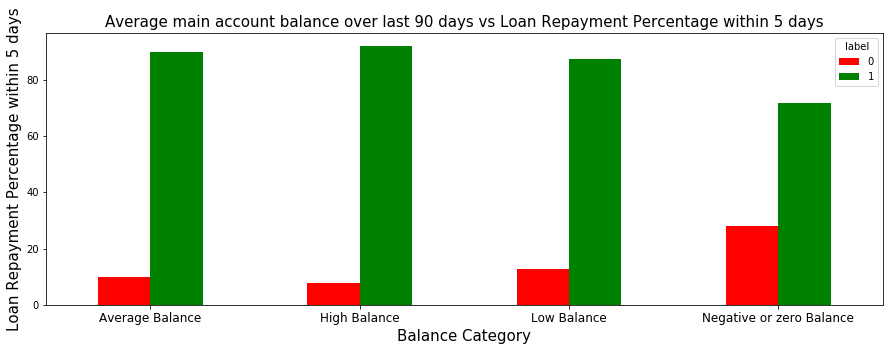

In [40]:
# 
balance_category_percent.plot(kind='bar',color='rgbymck',figsize=(15,5))
plt.title('Average main account balance over last 90 days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Balance Category',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)


From the above Graph and the crosstab table it is clear that:
1) 28% of Users having negative or zero balance are defaulters, which is very high.
2) 10% to 12% Users are defaulters which falls in the category of Average and Low balance category.
3) Users having high balance and are defaulters are very less in number


In [41]:
# cnt_loans90: Number of loans taken by user in last 90 days
conditions_2=[(df_visual['cnt_loans90'] <=0),df_visual['cnt_loans90'].between(0,2),(df_visual['cnt_loans90'] > 2)]
values_2= ['No Loans Taken', 'Average number of loans Taken','Too much loans taken']
df_visual['Loans_Frequency']=np.select(conditions_2,values_2)

In [42]:
df_visual['Loans_Frequency'].value_counts()

Average number of loans Taken    163223
Too much loans taken              31902
No Loans Taken                     1949
Name: Loans_Frequency, dtype: int64

In [43]:
# Mapping balance groups with precentage value with respect to label 
Loans_Frequency_percent = pd.crosstab(df_visual['label'],df_visual['Loans_Frequency']).apply(lambda x: x/x.sum()*100)
Loans_Frequency_percent = Loans_Frequency_percent.transpose()
Loans_Frequency_percent

label,0,1
Loans_Frequency,,
Average number of loans Taken,13.882235,86.117765
No Loans Taken,0.000000,100.000000
Too much loans taken,1.159802,98.840198


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

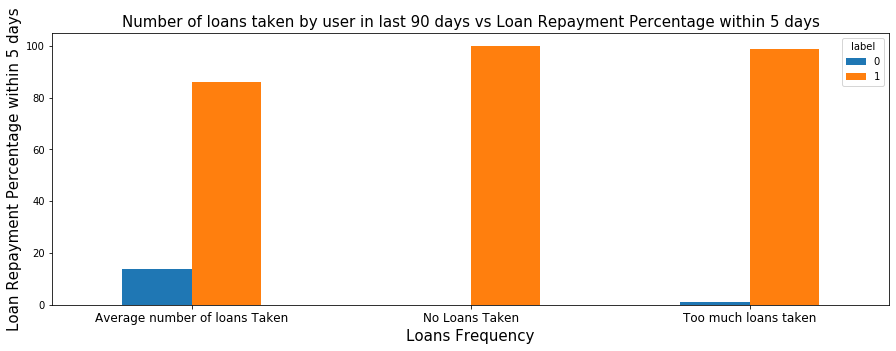

In [44]:
# 
Loans_Frequency_percent.plot(kind='bar',figsize=(15,5))
plt.title('Number of loans taken by user in last 90 days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Loans Frequency',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)


From the above graph it is clear that:
1) Users who take more number of loans are non-defaulters (i.e. 98% of the category) as they repays the loan within the given time i.e. 5 days.
2) 14% of the Users are are among the average number of loan taken category are defaulters.


In [45]:
# sumamnt_ma_rech90:Total amount of recharge in main account over last 90 days (in Indian Rupee)
conditions_3=[(df_visual['sumamnt_ma_rech90'] <=0),df_visual['sumamnt_ma_rech90'].between(0,12),df_visual['sumamnt_ma_rech90'].between(12,15),(df_visual['sumamnt_ma_rech90'] > 14)]
values_3= ['No Recharge', 'Between 0 and 12(Rupiah)', 'Between 12 and 15(Rupiah)','More than 15']
df_visual['Recharge_Amount_Category']=np.select(conditions_3,values_3)

In [46]:
df_visual['Recharge_Amount_Category'].value_counts()

Between 12 and 15(Rupiah)    122743
More than 15                  47882
No Recharge                   18683
Between 0 and 12(Rupiah)       7766
Name: Recharge_Amount_Category, dtype: int64

In [47]:
# Mapping balance groups with precentage value with respect to label 
Recharge_Amount_Category_percent = pd.crosstab(df_visual['label'],df_visual['Recharge_Amount_Category']).apply(lambda x: x/x.sum()*100)
Recharge_Amount_Category_percent = Recharge_Amount_Category_percent.transpose()
Recharge_Amount_Category_percent

label,0,1
Recharge_Amount_Category,,
Between 0 and 12(Rupiah),34.226114,65.773886
Between 12 and 15(Rupiah),9.822963,90.177037
More than 15,1.637359,98.362641
No Recharge,40.304020,59.695980


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

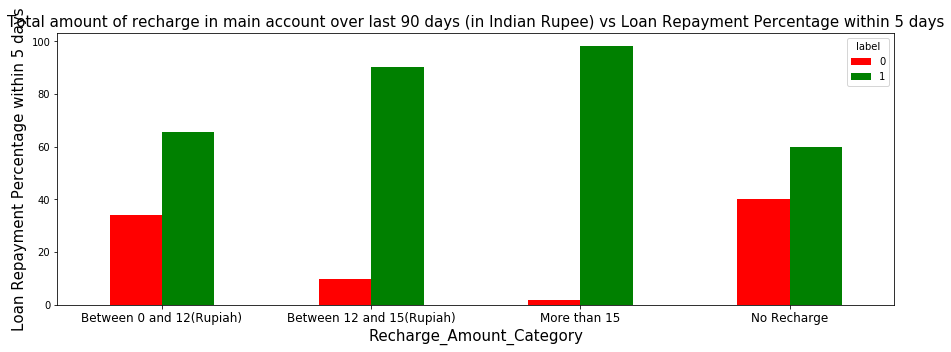

In [48]:

Recharge_Amount_Category_percent.plot(kind='bar',color='rgbymck',figsize=(15,5))
plt.title('Total amount of recharge in main account over last 90 days (in Indian Rupee) vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Recharge_Amount_Category',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)


From the above graph it is clear that:
1) 40 % of the Users who do not even recharged in the 90 days are defaulters only.
2) Users who do very high amount of recharge always pays their loans on time. i.e 98% of them are non-defaulters.    	
3) 34% of the Users who do less amount of recharge are defaulters.


In [49]:
# payback90:Average payback time in days over last 90 days
conditions_4=[(df_visual['payback90'] <=5),(df_visual['payback90'] > 5)]
values_4= ['Not Defaulters','Defaulters']
df_visual['Defaulters_Category']=np.select(conditions_4,values_4)

In [50]:
df_visual['Defaulters_Category'].value_counts()

Not Defaulters    196995
Defaulters            79
Name: Defaulters_Category, dtype: int64

In [51]:
# Mapping balance groups with precentage value with respect to label 
Defaulters_Category_percent = pd.crosstab(df_visual['label'],df_visual['Defaulters_Category']).apply(lambda x: x/x.sum()*100)
Defaulters_Category_percent = Defaulters_Category_percent.transpose()
Defaulters_Category_percent

label,0,1
Defaulters_Category,,
Defaulters,11.392405,88.607595
Not Defaulters,11.685576,88.314424


(array([0, 1]), <a list of 2 Text xticklabel objects>)

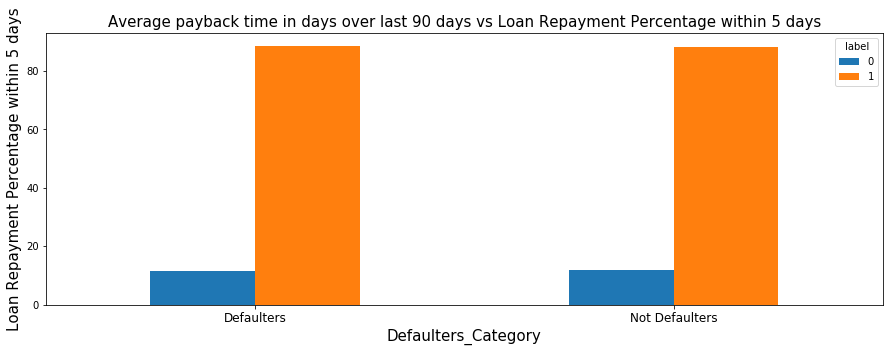

In [52]:
# 
Defaulters_Category_percent.plot(kind='bar',figsize=(15,5))
plt.title('Average payback time in days over last 90 days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Defaulters_Category',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)


In [53]:
# amnt_loans90: Total amount of loans taken by user in last 90 days
conditions_5=[(df_visual['amnt_loans90'] <=0),df_visual['amnt_loans90'].between(0,1),df_visual['amnt_loans90'].between(1,3),(df_visual['amnt_loans90'] > 3)]
values_5= ['No loans', 'Low Amount', 'Average Amount','High Amount']
df_visual['Loan_Amount_Category']=np.select(conditions_5,values_5)

In [54]:
df_visual['Loan_Amount_Category'].value_counts()

Average Amount    122273
High Amount        72852
No loans            1949
Name: Loan_Amount_Category, dtype: int64

In [55]:
# Mapping balance groups with precentage value with respect to label 
Loan_Amount_Category_percent = pd.crosstab(df_visual['label'],df_visual['Loan_Amount_Category']).apply(lambda x: x/x.sum()*100)
Loan_Amount_Category_percent = Loan_Amount_Category_percent.transpose()
Loan_Amount_Category_percent

label,0,1
Loan_Amount_Category,,
Average Amount,17.415128,82.584872
High Amount,2.381541,97.618459
No loans,0.000000,100.000000


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

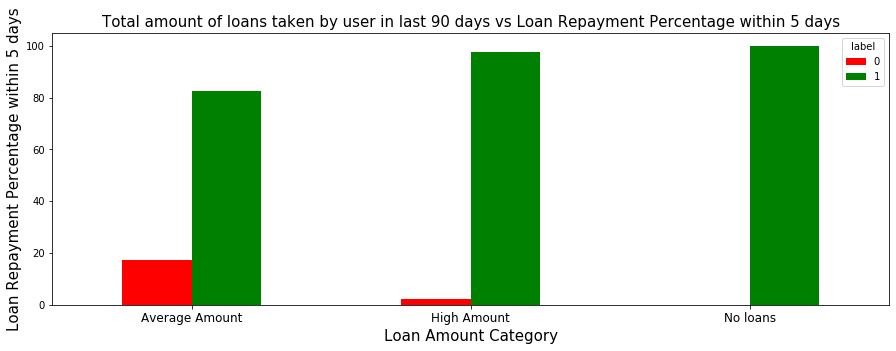

In [56]:
# 
Loan_Amount_Category_percent.plot(kind='bar',color='rgbymck',figsize=(15,5))
plt.title('Total amount of loans taken by user in last 90 days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Loan Amount Category',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)


From the above graph it is clear that:
1) Users who did not take any loans are non-defaulters.
2) Most of the Users (i.e. 97%) who take large amount of loans comes under non defaulter category.
3) 17% of the users who take small loans are defaulters.


In [57]:
# cnt_ma_rech90 :Number of times main account got recharged in last 90 days
conditions_6=[(df_visual['cnt_ma_rech90'] <=0),df_visual['cnt_ma_rech90'].between(0,1),df_visual['cnt_ma_rech90'].between(1,3),(df_visual['cnt_ma_rech90'] > 3)]
values_6= ['Not Recharged', 'Low Recharge Frequency', 'Average Recharge Frequency','High Recharge Frequency']
df_visual['Recharge Frequency']=np.select(conditions_6,values_6)

In [58]:
df_visual['Recharge Frequency'].value_counts()

Average Recharge Frequency    142698
Low Recharge Frequency         25315
Not Recharged                  18683
High Recharge Frequency        10378
Name: Recharge Frequency, dtype: int64

In [59]:
# Mapping balance groups with precentage value with respect to label 
Recharge_Frequency_percent = pd.crosstab(df_visual['label'],df_visual['Recharge Frequency']).apply(lambda x: x/x.sum()*100)
Recharge_Frequency_percent = Recharge_Frequency_percent.transpose()
Recharge_Frequency_percent

label,0,1
Recharge Frequency,,
Average Recharge Frequency,6.213121,93.786879
High Recharge Frequency,0.645596,99.354404
Low Recharge Frequency,25.937191,74.062809
Not Recharged,40.304020,59.695980


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

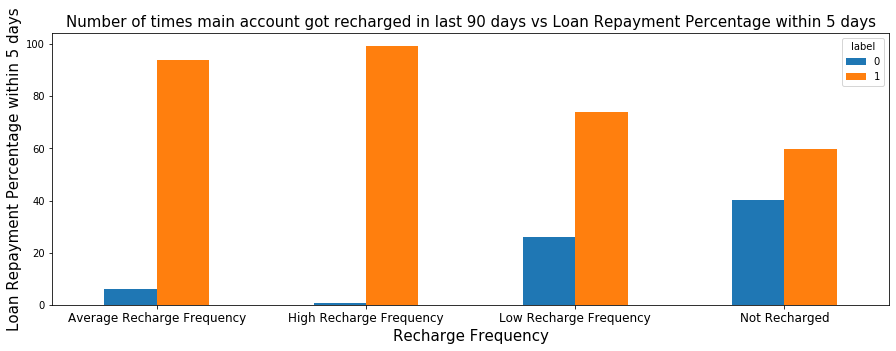

In [60]:
# 
Recharge_Frequency_percent.plot(kind='bar',figsize=(15,5))
plt.title('Number of times main account got recharged in last 90 days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Recharge Frequency',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)


From the above graph it is clear that:
1) Among the Users who have not done a single recharge in 3 months 40% are defaulters.
2) Among the Users who are very frequent in recharging and who always pay their loans on time are more in number i.e 99% of the total category, which is a good news for the company.


In [61]:
# aon
conditions_7=[(df_visual['aon'] <2),df_visual['aon'].between(2,5),(df_visual['aon'] > 5)]
values_7= ['New Users','Average Users','Old Users']
df_visual['Users_Category']=np.select(conditions_7,values_7)

In [62]:
df_visual['Users_Category'].value_counts()

Old Users        173827
Average Users     23143
New Users           104
Name: Users_Category, dtype: int64

In [63]:
# Mapping balance groups with precentage value with respect to label 
Users_Category_percent = pd.crosstab(df_visual['label'],df_visual['Users_Category']).apply(lambda x: x/x.sum()*100)
Users_Category_percent = Users_Category_percent.transpose()
Users_Category_percent

label,0,1
Users_Category,,
Average Users,19.418399,80.581601
New Users,32.692308,67.307692
Old Users,10.643341,89.356659


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

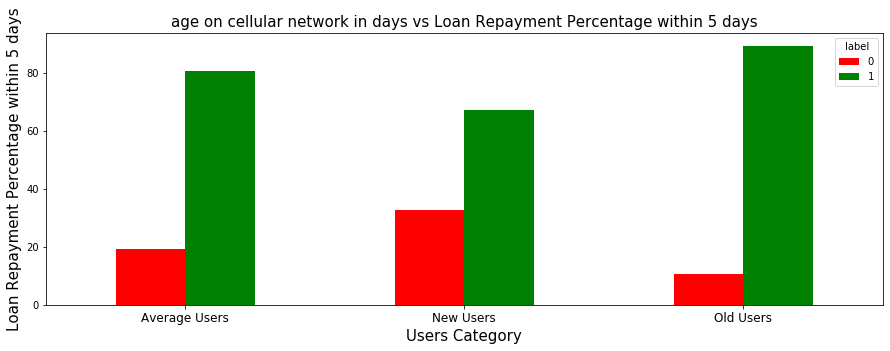

In [64]:
# 
Users_Category_percent.plot(kind='bar',color='rgbymck',figsize=(15,5))
plt.title('age on cellular network in days vs Loan Repayment Percentage within 5 days',fontsize=15)
plt.ylabel('Loan Repayment Percentage within 5 days',fontsize=15)
plt.xlabel('Users Category',fontsize=15)
plt.xticks(rotation = 'horizontal',fontsize=12)


From the above graph it is clear that:
1) 32% of the users who are defaulters are the new users.
2) Old Users are trusted and they are mostly non defaulters.


# End of Document